In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('This Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

This Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [4]:
data = pd.DataFrame.from_csv('data2012.csv', index_col=None, encoding='utf-8')
race = pd.DataFrame.from_csv('race2012.csv', index_col=None, encoding='utf-8')

In [5]:
data[:4]

,Unnamed: 0,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract Schools,All Grades,2012,34.7,1.0,-0.4 to 2.3,84,Yellow,34.7,0.0,-1.1 to 1,51,Yellow
1,1,"LOCKE, A CHTR",400011,Charter/Contract Schools,All Grades,2012,202.7,-1.0,-1.9 to -0.1,14,Red,202.7,0.1,-0.4 to 0.6,57,Yellow
2,2,AMANDLA CHTR HS,400012,Charter/Contract Schools,All Grades,2012,276.9,-0.9,-1.8 to -0.1,16,Red,277.9,-0.5,-1 to 0,28,Red
3,3,ASPIRA CHTR - HAUGAN,400017,Charter/Contract Schools,All Grades,2012,468.7,-1.0,-1.7 to -0.3,14,Red,468.6,-0.4,-0.8 to 0,30,Red


In [6]:
data.dtypes

Unnamed: 0                  int64
school_name                object
school_id                   int64
network                    object
grade                      object
year                        int64
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
dtype: object

In [7]:
race[:4]

,school_id,School,Total,White,Whiteperc,Black,Blackperc,PacIsl,PasIslperc,NatAm,NatAmperc,Hispanic,Hispanicperc,multi,Multiperc,Aisian,Asianperc,Haw,Hawperc,NA,Naperc,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,400010,ACE Tech Chtr HS,500,24,4.8,322,64.4,0,0,7,1.4,134,26.8,11,2.2,0,0.0,0,0,2,0.4,NaN,NaN,NaN
1,400013,ASPIRA Chrt - Early College,505,6,1.2,15,3.0,0,0,1,0.2,476,94.3,2,0.4,3,0.6,0,0,2,0.4,NaN,NaN,NaN
2,400017,ASPIRA Chrt - Haugan,592,16,2.7,34,5.7,0,0,3,0.5,514,86.8,5,0.8,19,3.2,0,0,1,0.2,NaN,NaN,NaN
3,400015,ASPIRA Chrt - Ramirez,397,14,3.5,48,12.1,0,0,1,0.3,330,83.1,0,0.0,4,1.0,0,0,0,0.0,NaN,NaN,NaN


In [8]:
race.dtypes

school_id         int64
School           object
Total             int64
White             int64
Whiteperc       float64
Black             int64
Blackperc       float64
PacIsl            int64
PasIslperc      float64
NatAm             int64
NatAmperc       float64
Hispanic          int64
Hispanicperc    float64
multi             int64
Multiperc       float64
Aisian            int64
Asianperc       float64
Haw               int64
Hawperc         float64
NA                int64
Naperc          float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
dtype: object

In [9]:
left = data
right = race
result = pd.merge(left, right, on='school_id')
result.shape

(532, 39)

In [10]:
result[:4]

,Unnamed: 0,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,School,Total,White,Whiteperc,Black,Blackperc,PacIsl,PasIslperc,NatAm,NatAmperc,Hispanic,Hispanicperc,multi,Multiperc,Aisian,Asianperc,Haw,Hawperc,NA,Naperc,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract Schools,All Grades,2012,34.7,1.0,-0.4 to 2.3,84,Yellow,34.7,0.0,-1.1 to 1,51,Yellow,Globel Citizenship,247,24,9.7,15,6.1,0,0,1,0.4,203,82.2,3,1.2,0,0.0,0,0,1,0.4,NaN,NaN,NaN
1,1,"LOCKE, A CHTR",400011,Charter/Contract Schools,All Grades,2012,202.7,-1.0,-1.9 to -0.1,14,Red,202.7,0.1,-0.4 to 0.6,57,Yellow,Locke A. Charter,588,2,0.3,575,97.8,0,0,1,0.2,7,1.2,2,0.3,0,0.0,0,0,1,0.2,NaN,NaN,NaN
2,2,AMANDLA CHTR HS,400012,Charter/Contract Schools,All Grades,2012,276.9,-0.9,-1.8 to -0.1,16,Red,277.9,-0.5,-1 to 0,28,Red,Amandla Elementay Chrtr,348,0,0.0,347,99.7,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1,0.3,NaN,NaN,NaN
3,3,ASPIRA CHTR - HAUGAN,400017,Charter/Contract Schools,All Grades,2012,468.7,-1.0,-1.7 to -0.3,14,Red,468.6,-0.4,-0.8 to 0,30,Red,ASPIRA Chrt - Haugan,592,16,2.7,34,5.7,0,0,3,0.5,514,86.8,5,0.8,19,3.2,0,0,1,0.2,NaN,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     26.71
Date:                Mon, 17 Aug 2015   Prob (F-statistic):           3.35e-07
Time:                        14:40:45   Log-Likelihood:                -2211.4
No. Observations:                 532   AIC:                             4427.
Df Residuals:                     530   BIC:                             4435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.9800      0.671     11.888      0.000         6.661     9.299
x              3.3636      0.651      5.168      0.000         2.085     4.642
==============================================================================
Omnibus:                      255.799   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.896
Skew:                           2.282   Prob(JB):                    1.37e-219
Kurtosis:                       7.963   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

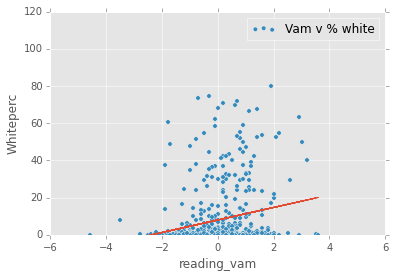

In [32]:
# different way, assign x and y
x = result['reading_vam']
y = result['Whiteperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam', y='Whiteperc',label="Vam v % white")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.434
Date:                Mon, 17 Aug 2015   Prob (F-statistic):              0.232
Time:                        15:12:43   Log-Likelihood:                -2223.8
No. Observations:                 532   AIC:                             4452.
Df Residuals:                     530   BIC:                             4460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.9796      0.687     11.614      0.000         6.630     9.329
x              0.7741      0.646      1.197      0.232        -0.496     2.044
==============================================================================
Omnibus:                      265.046   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1066.508
Skew:                           2.375   Prob(JB):                    2.57e-232
Kurtosis:                       8.055   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

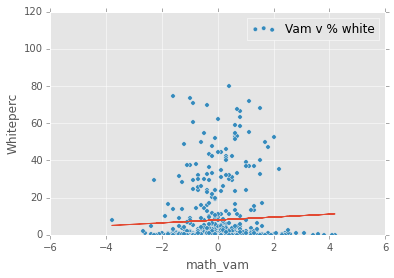

In [11]:
# different way, assign x and y
x = result['math_vam']
y = result['Whiteperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='math_vam', y='Whiteperc',label="Vam v % white")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     21.54
Date:                Mon, 17 Aug 2015   Prob (F-statistic):           4.37e-06
Time:                        14:41:53   Log-Likelihood:                -2744.9
No. Observations:                 532   AIC:                             5494.
Df Residuals:                     530   BIC:                             5502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     53.3212      1.830     29.138      0.000        49.726    56.916
x             -8.2347      1.774     -4.641      0.000       -11.720    -4.749
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.742   Jarque-Bera (JB):               64.363
Skew:                          -0.081   Prob(JB):                     1.06e-14
Kurtosis:                       1.304   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

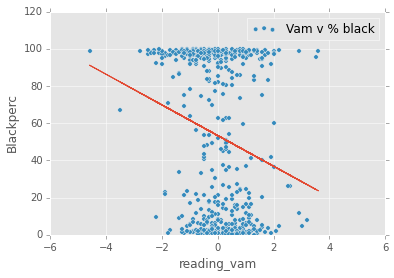

In [33]:
# different way, assign x and y
x = result['reading_vam']
y = result['Blackperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam', y='Blackperc',label="Vam v % black")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.233
Date:                Mon, 17 Aug 2015   Prob (F-statistic):              0.267
Time:                        15:13:25   Log-Likelihood:                -2754.9
No. Observations:                 532   AIC:                             5514.
Df Residuals:                     530   BIC:                             5522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     53.3216      1.865     28.596      0.000        49.659    56.985
x             -1.9479      1.754     -1.110      0.267        -5.394     1.498
==============================================================================
Omnibus:                        0.953   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.621   Jarque-Bera (JB):               75.509
Skew:                          -0.103   Prob(JB):                     4.01e-17
Kurtosis:                       1.166   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

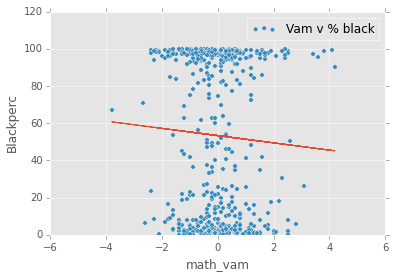

In [12]:
# different way, assign x and y
x = result['math_vam']
y = result['Blackperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='math_vam', y='Blackperc',label="Vam v % black")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.266
Date:                Mon, 17 Aug 2015   Prob (F-statistic):             0.0394
Time:                        14:43:20   Log-Likelihood:                -2674.1
No. Observations:                 532   AIC:                             5352.
Df Residuals:                     530   BIC:                             5361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.9609      1.602     21.201      0.000        30.814    37.108
x              3.2078      1.553      2.066      0.039         0.157     6.259
==============================================================================
Omnibus:                      569.494   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.523
Skew:                           0.624   Prob(JB):                     8.00e-16
Kurtosis:                       1.743   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

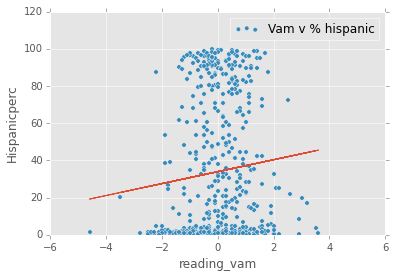

In [34]:
# different way, assign x and y
x = result['reading_vam']
y = result['Hispanicperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam', y='Hispanicperc',label="Vam v % hispanic")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2438
Date:                Mon, 17 Aug 2015   Prob (F-statistic):              0.622
Time:                        15:13:57   Log-Likelihood:                -2676.1
No. Observations:                 532   AIC:                             5356.
Df Residuals:                     530   BIC:                             5365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.9606      1.608     21.120      0.000        30.802    37.119
x              0.7469      1.513      0.494      0.622        -2.225     3.719
==============================================================================
Omnibus:                      729.414   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.590
Skew:                           0.620   Prob(JB):                     4.69e-16
Kurtosis:                       1.717   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

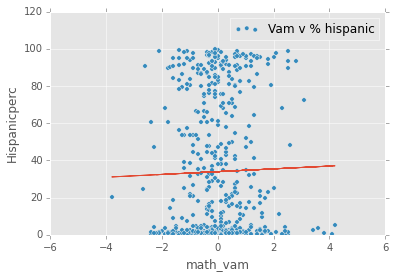

In [13]:
# different way, assign x and y
x = result['math_vam']
y = result['Hispanicperc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='math_vam', y='Hispanicperc',label="Vam v % hispanic")
plt.ylim(0, 120)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()